<a href="https://colab.research.google.com/github/xGiannis/IntroModeladoContinuo/blob/main/Colabs/nb05_CiclosLimite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> (Última Actualización: 23 de Septiembre de 2025)

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)**. En el caso 2D, vamos a tener conjuntos de pares de ecuaciones que describen la evolución temporal de dos variables.

Podemos ver directamente como encontrar **soluciones al problema de valor inicial en 2D** usando métodos de **integración numérica** 2D, que van a ser trayectorias en el diagrama de fases. Además vimos que podemos entender mejor el sistema mediante la aplicación de diversas **herramientas gráficas**. Esto nos permitió estudiar distintos tipos de puntos fijos de acuerdo a como condicionan el flujo en el espacio de fases.

En este Colab, vamos a aplicar las herramientas aprendidas para el estudio del flujo bidimensional, pero en este caso para incorporar nuevos elementos dinámicos relevantes, los cuales no podían aparecer para sistemas unidimensionales. Se trata de los **ciclos límite**.

$$
x(t_0+\tau) = x(t_0) \neq x(t), \forall t
$$

---
# Ciclos límite

Definimos como ciclo límite a una órbita periódica aislada.

<center>
<img src="https://lh4.googleusercontent.com/proxy/6-fL6oliiEmpNnrSdFa-LeWroIvfU2Krb1kBFhLJSIWSHyzxEREfd3vSlRl8dMmoPoVuARg0gq_Q3vvdKM8ZbYuj863JixheDuYMtzdJEg" width="500"/>
</center>



import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

---
## Ejercicio 1

Sea el sistema descrito por el siguiente conjunto de ecuaciones

$$
\dot{x} = y\\
\dot{y} = -x
$$

Encuentre la solución para condiciones iniciales [1, 0]. Es periódica? Si así lo pareciera, busque el período de la solución. Para esto se propone encontrar los picos de la señal con `scipy.signal.find_peaks`, encontrar la distancia entre esos picos con `numpy.diff`, y ver si la solución muestra una periodicidad definida. Puedo decir que se trata de un ciclo límite? Justifique usando las herramientas vistas.



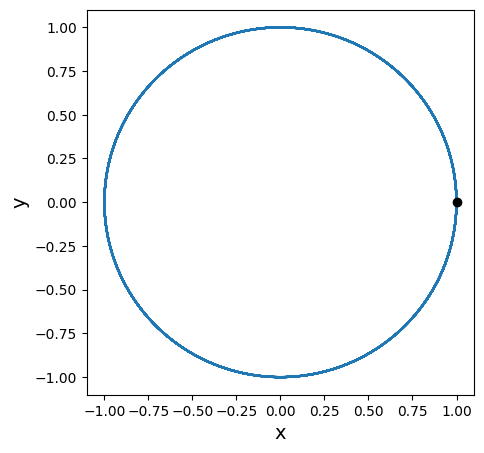

In [18]:
# # # COMPLETAR

def ejer1(t,z):

  x = z[0]
  y = z[1]

  dxdt=y
  dydt=-x

  return [dxdt,dydt]



dt = 0.001
tmax = 100
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(ejer1, [t[0], t[-1]], zi, t_eval=t, method='RK45')

plt.figure(figsize=(5,5))
plt.plot(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()



In [19]:
#plt.plot(sol.y[0, :])

graf=sol.y[0,:]


picos_indices = sp.signal.find_peaks(graf)[0]

print("Indices of peaks:", picos_indices)

# Get the values at the peak indices
peak_values = graf[picos_indices]
print("Values at peaks:", peak_values)


dist = np.diff(peak_values)

print("Difference between peak indices:", dist)

#el período es uno de estos o promedio youknow

#No es un ciclo limite. Son orbitas periodicas no aisladas

periodo = np.mean(dist)
print(periodo)




Indices of peaks: [ 6280 12564 18843 25127 31406 37689 43968 50252 56531 62814 69093 75377
 81656 87939 94219]
Values at peaks: [1.00011805 1.00007753 1.00002796 0.99991454 0.99993615 0.99975447
 0.9998372  0.99959865 0.99973058 0.99943753 0.99962755 0.9992743
 0.99952372 0.99911449 0.99941372]
Difference between peak indices: [-4.05188131e-05 -4.95630692e-05 -1.13423859e-04  2.16140644e-05
 -1.81681232e-04  8.27236521e-05 -2.38551574e-04  1.31934523e-04
 -2.93052715e-04  1.90019949e-04 -3.53247150e-04  2.49420585e-04
 -4.09233745e-04  2.99236722e-04]
-5.030876153462792e-05


---
## Ejercicio 2

Sea el sistema descrito por el siguiente conjunto de ecuaciones

$$
\dot{x} = y(1+\epsilon x)\\
\dot{y} = -x(1+\epsilon x)
$$

2.1. Para alguna condición inicial particular, integre las ecuaciones.

2.2. Estime el período.

2.3. Ahora vuelva a integrar definiendo como tiempo de integración un único período completo. Considere usar un paso grande, para tener un muestreo bastante discreto de las soluciones y grafique los puntos de la solución en lugar de líneas sólidas. Compare con las soluciones del ejercicio anterior. Qué encuentra de diferente?

2.4. Transforme las soluciones encontradas a coordenadas polares usando:

$$
\rho = \sqrt{x^2+y^2}\\
\phi = arctan \left(\frac{y}{x} \right)
$$

Qué puede decir del problema y de su comparación con el ejercicio anterior desde esta perspectiva?


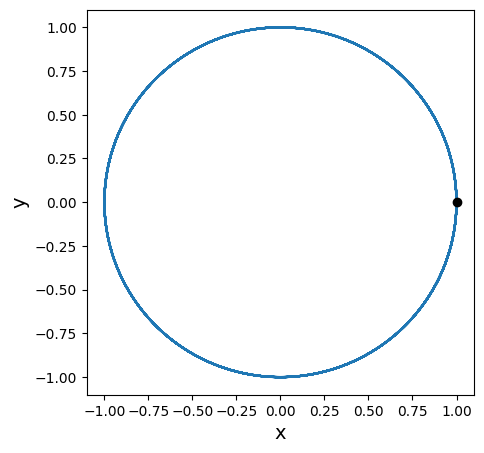

In [20]:
# # # COMPLETAR
def ejer2(t,z,eps):

  x = z[0]
  y = z[1]
  dxdt=y*(1+eps*x)
  dydt=-x*(1+eps*x)
  return [dxdt,dydt]

#2.1. Para alguna condición inicial particular, integre las ecuaciones.



#eps= 0.1
eps= 0.00001
dt = 0.001
tmax = 100
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(ejer2, [t[0], t[-1]], zi, t_eval=t, method='RK45',args=(eps,))

plt.figure(figsize=(5,5))
plt.plot(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)


plt.show()




In [21]:
picos_indices = sp.signal.find_peaks(graf,height=0.5)[0]

print("Indices of peaks:", picos_indices)

# Get the values at the peak indices
peak_values = t[picos_indices]
print("Values at peaks:", peak_values)


dist = np.diff(peak_values)

print("Difference between peak indices:", dist)

#el período es uno de estos o promedio youknow

#No es un ciclo limite. Son orbitas periodicas no aisladas

periodo = np.mean(dist)
print(periodo)




Indices of peaks: [ 6280 12564 18843 25127 31406 37689 43968 50252 56531 62814 69093 75377
 81656 87939 94219]
Values at peaks: [ 6.28  12.564 18.843 25.127 31.406 37.689 43.968 50.252 56.531 62.814
 69.093 75.377 81.656 87.939 94.219]
Difference between peak indices: [6.284 6.279 6.284 6.279 6.283 6.279 6.284 6.279 6.283 6.279 6.284 6.279
 6.283 6.28 ]
6.281357142857144


Text(0, 0.5, 'y')

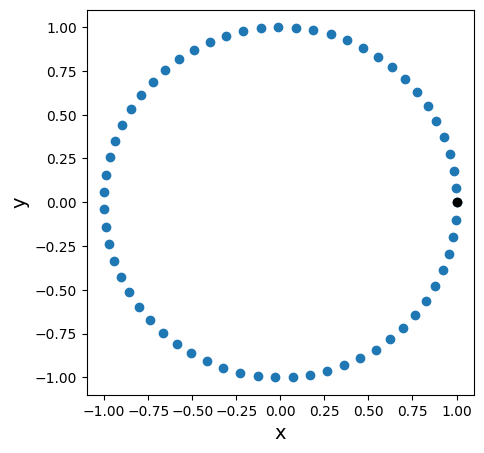

In [22]:
#Ahora vuelva a integrar definiendo como tiempo de integración un único período completo.
#Considere usar un paso grande, para tener un muestreo bastante discreto de las soluciones y grafique los puntos de la solución en
#lugar de líneas sólidas. Compare con las soluciones del ejercicio anterior. Qué encuentra de diferente?


eps= 0.00001
dt = 0.1
tmax = periodo
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
sol = sp.integrate.solve_ivp(ejer2, [t[0], t[-1]], zi, t_eval=t, method='RK45',args=(eps,))


plt.figure(figsize=(5,5))
plt.scatter(sol.y[0, :], sol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

#se va acercando a 0, es un ciclo limite. ¿por que no vemos un circulo si estamos integrando sobre un período?


Text(0, 0.5, 'phi')

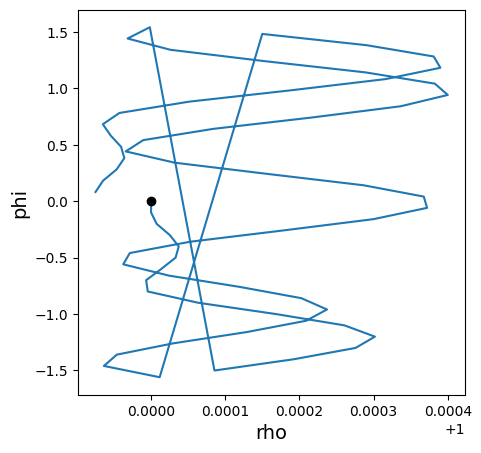

In [23]:
def polares(x,y):
  rho = np.sqrt(x**2+y**2)
  phi = np.arctan(y/x)
  return rho,phi




rho, phi = polares(sol.y[0, :], sol.y[1, :])

plt.figure(figsize=(5,5))
#plt.scatter(rho, phi)
plt.plot(rho, phi)
plt.plot(rho[0],phi[0],'ko')
plt.xlabel('rho', fontsize=14)
plt.ylabel('phi', fontsize=14)


---
## Ejercicio 3

La ecuación del [oscilador de Van der Pol](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) está dada por

$$
\ddot{x} - \mu(1 - x^2)\dot{x} + x = 0
$$

3.1. Escriba una función llamada `van_der_pol` para esta ecuación expresada como un sistema dinámico.

3.2. Integre con `solve_ivp` para $\mu=2$ con condiciones iniciales $x=1$ y $\dot{x}=0$, dandole suficiente tiempo a la solución según considere.

3.3. Grafique el diagrama de fases ($x$, $\dot{x}$) de la solución con puntos en lugar de con líneas sólidas (incluya el punto de la condición inicial de manera distintiva). Qué puede observar en referencia a la distancia entre puntos? A qué se lo atribuye?


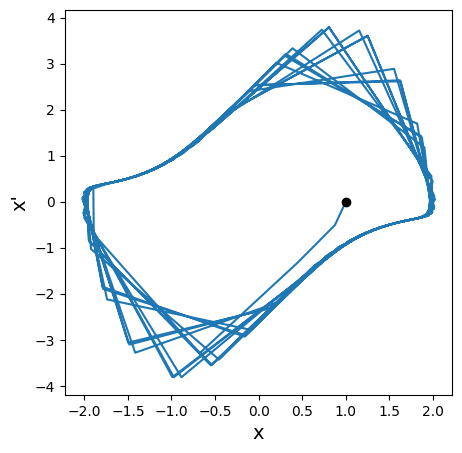

In [24]:
# # # COMPLETAR

def van_der_pol(t,z,mu):

  x = z[0]
  y = z[1]
  dxdt=y
  dydt=mu*(1-x**2)*y-x
  return [dxdt,dydt]

mu=2
dt = 0.5
tmax = 100
t = np.arange(0, tmax, dt)
xi = 1
yi = 0
ti = t[0]
zi = [xi, yi]
solvandersol = sp.integrate.solve_ivp(van_der_pol, [t[0], t[-1]], zi, t_eval=t, method='RK45',args=(mu,))

plt.figure(figsize=(5,5))
plt.plot(solvandersol.y[0, :], solvandersol.y[1, :])
plt.plot(xi, yi, 'ko')
plt.xlabel('x', fontsize=14)
plt.ylabel('x\'', fontsize=14)

plt.show()


In [25]:
#3.3. Grafique el diagrama de fases (x, x˙) de la solución con puntos en lugar de
#con líneas sólidas (incluya el punto de la condición inicial de manera distintiva).
# Qué puede observar en referencia a la distancia entre puntos? A qué se lo atribuye?




<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3015653341.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Diagrama de Fases del Oscilador de Van der Pol ($\mu=2$)')


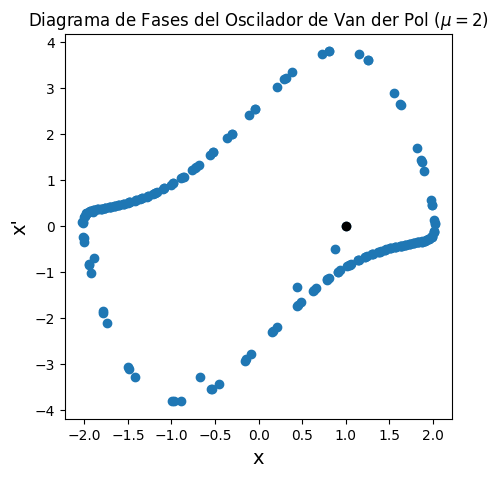

In [26]:
#3.3. Grafique el diagrama de fases (x, x˙) de la solución con puntos en lugar de
#con líneas sólidas (incluya el punto de la condición inicial de manera distintiva).
# Qué puede observar en referencia a la distancia entre puntos? A qué se lo atribuye?

#diagrama de fases

plt.figure(figsize=(5,5))
plt.plot(solvandersol.y[0, :], solvandersol.y[1, :], 'o')
plt.plot(xi, yi, 'ko') # Plot initial condition
plt.xlabel('x', fontsize=14)
plt.ylabel('x\'', fontsize=14)
plt.title('Diagrama de Fases del Oscilador de Van der Pol ($\mu=2$)')
plt.show()

---
## Ejercicio 4

Sea el siguiente sistema visto en clase

$$
\dot{\rho} = \rho(1-\rho)\\
\dot{\phi} = \omega + sin(\phi)
$$

4.1. Integre el sistema para w=1 usando distintas condiciones iniciales con $\rho$ entre 0 y 2, y $\phi_{inicial}=0$. Vea la evolución temporal de $\rho$.

4.2. Integre el sistema para w igual a -1, 0, y 1 usando como condiciones iniciales $\rho_{inicial}=1$ y $\phi_{inicial}=0$. Vea la evolución temporal de $\phi$. Cómo interpreta lo que está pasando?

4.3. Integre el sistema para w=1, usando como condiciones iniciales $\rho_{inicial}=1$ y $\phi_{inicial}=0$. Haga la transformación a coordenadas cartesianas usando las expresiones

$$
x = \rho.cos(\phi)\\
y = \rho.sin(\phi)
$$

Grafique en el diagrama de fases ($x$, $y$), pero usando puntos en lugar de una línea sólida. Qué observa? Estudie el flujo del campo vector para entender mejor lo que está pasando.

Para eso, genere una grilla en ($x$,$y$). Transformela a coordenadas polares usando la expresión

$$
\rho = \sqrt{x^2+y^2}\\
\phi = arctan \left(\frac{y}{x} \right)
$$

Calcule los valores del campo vector sin integrar en coordenadas polares y transforme esas velocidades a coordenadas cartesianas

$$
\dot{x} = \dot{\rho} \cos(\phi) - \rho \dot{\phi} \sin(\phi)\\
\dot{y} = \dot{\rho} \sin(\phi) + \rho \dot{\phi} \cos(\phi)
$$

Grafique usando `quiver`.


In [27]:
# # # COMPLETAR
def sistema(t,z,w):

  rho = z[0]
  phi = z[1]
  drhodt=rho*(1-rho)
  dphidt=w+np.sin(phi)
  return [drhodt,dphidt]



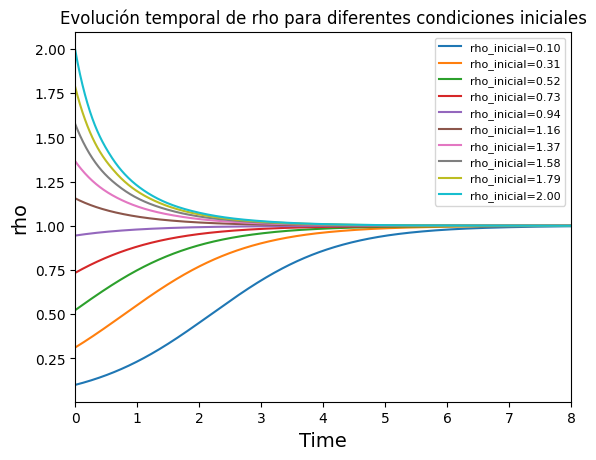

In [28]:
#4.1
w=1
tita_inicial=0

#creamos 10 condiciones iniciales para p
p_iniciales = np.linspace(0.1, 2, 10) # Start from a small non-zero value to avoid issues with arctan(0/0)

rho_iniciales = p_iniciales
phi_iniciales = np.zeros_like(p_iniciales)

#integramos
dt = 0.01
tmax = 100
t = np.arange(0, tmax, dt)

plt.figure()
plt.xlabel('Time', fontsize=14)
plt.ylabel('rho', fontsize=14)

for i in range(len(rho_iniciales)):
    zi = [rho_iniciales[i], phi_iniciales[i]]
    sol = sp.integrate.solve_ivp(sistema, [t[0], t[-1]], zi, t_eval=t, method='RK45',args=(w,))
    plt.plot(sol.t, sol.y[0, :], label=f'rho_inicial={rho_iniciales[i]:.2f}')

plt.xlim(0, 8)

plt.legend(fontsize=8, loc='upper right') # Adjusted legend size and position
plt.title('Evolución temporal de rho para diferentes condiciones iniciales')
plt.show()

Rho converge a 0 para todos los casos

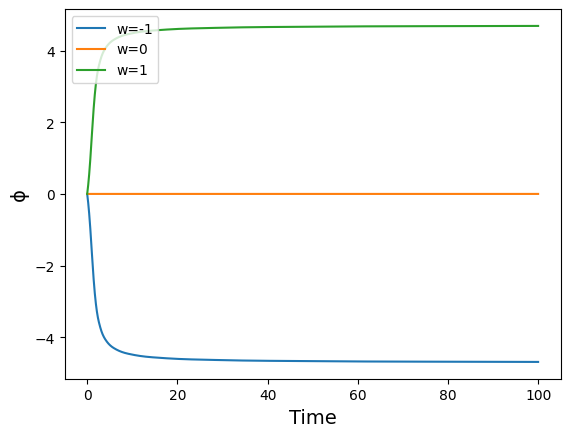

In [29]:
#4.2. Integre el sistema para w igual a -1, 0, y 1 usando como condiciones iniciales ρinicial=1 y ϕinicial=0.
#Vea la evolución temporal de ϕ. Cómo interpreta lo que está pasando?


p_inicial = 1
tita_inicial = 0


for w in [-1, 0, 1]:
    zi = [p_inicial, tita_inicial]
    #veo la evolucion temporal de tita ϕ

    sol = sp.integrate.solve_ivp(sistema, [t[0], t[-1]], zi, t_eval=t, method='RK45',args=(w,))


    plt.plot(sol.t, sol.y[1, :], label=f'w={w}')

plt.xlabel('Time', fontsize=14)
plt.ylabel('ϕ', fontsize=14)
plt.legend()

converge a 3 puntos fijos, el 0 es repulsor, y 4.algo, -4.algo atractores

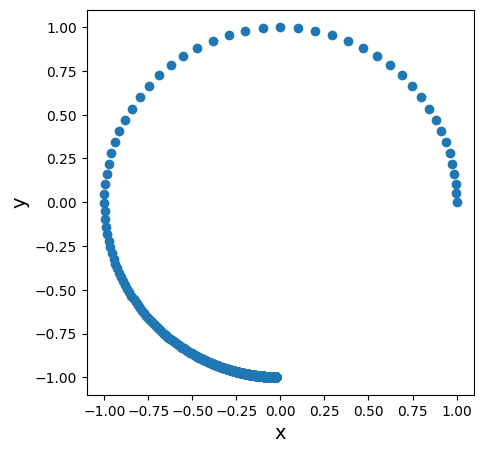

In [30]:
#4.3. Integre el sistema para w=1,
#usando como condiciones iniciales ρinicial=1 y ϕinicial=0.
#Haga la transformación a coordenadas cartesianas usando las expresiones


dt = 0.05
tmax = 100

t=np.arange(0,tmax,dt)

w=1

rho_inicial= 1
tita_inicial= 0

zi = [rho_inicial, tita_inicial]
sol = sp.integrate.solve_ivp(sistema, [t[0], t[-1]], zi, t_eval=t, method='RK45',args=(w,))

#Grafique en el diagrama de fases (x, y), pero usando puntos en lugar de una línea sólida.
#Qué observa? Estudie el flujo del campo vector para entender mejor lo que está pasando.
#Para eso, genere una grilla en (x,y). Transformela a coordenadas polares usando la expresión



def cartesianas(rho,phi):
  x = rho*np.cos(phi)
  y = rho*np.sin(phi)
  return x,y

x,y = cartesianas(sol.y[0, :],sol.y[1, :])

plt.figure(figsize=(5,5))

plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()




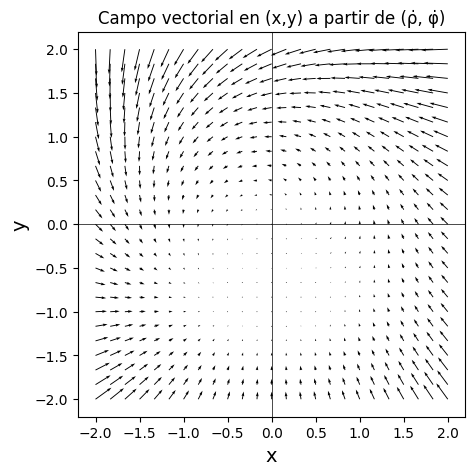

In [34]:
# Parámetro
w = 1.0

# Grilla cartesiana
x_grid, y_grid = np.meshgrid(np.linspace(-2, 2, 25), np.linspace(-2, 2, 25))

# A polares
rho_grid= np.sqrt(x_grid**2 + y_grid**2)
phi_grid = np.arctan2(y_grid, x_grid)

# Derivadas en polares (sin integrar)
rho_dot_grid = rho_grid * (1.0 - rho_grid)
phi_dot_grid = w + np.sin(phi_grid)

# Transformación a cartesiano
x_dot_grid = rho_dot_grid*np.cos(phi_grid) - rho_grid*phi_dot_grid*np.sin(phi_grid)
y_dot_grid = rho_dot_grid*np.sin(phi_grid) + rho_grid*phi_dot_grid*np.cos(phi_grid)

# Campo vectorial
plt.figure(figsize=(5,5))
plt.quiver(x_grid, y_grid, x_dot_grid, y_dot_grid)
plt.axvline(0, color='k', lw=0.5); plt.axhline(0, color='k', lw=0.5)
plt.xlabel('x', fontsize=14); plt.ylabel('y', fontsize=14)
plt.title('Campo vectorial en (x,y) a partir de (ρ̇, φ̇)')
plt.show()

---
## Ejercicio 5

Sea el sistema para la bifurcación de Hopf

$$
\dot{x} = \mu x + y\\
\dot{y} = -x + \mu y - x^2 y
$$

5.1. Integre el sistema con `solve_ivp` hasta un tiempo de 10, con paso temporal $dt=0.1$, condiciones iniciales $x=0$ y $y=0$, para para valores de $\mu=[-1, -0.5, 0, 0.5, 1]$. Calcule el radio como $r=\sqrt{x^2+y^2}$ y muestre las soluciones de $r$ para los distintos $\mu$ en un mismo gráfico. Qué muestran las observaciones sobre la evolución temporal en este punto?

5.2. Pruebe ahora de hacer lo mismo pero con condiciones iniciales $x=0.1$ y $y=0.1$ (puede demorar un minuto). Qué observa en relación al item anterior?

5.3. Estudie la bifurcación de este sistema. Cómo son las oscilaciones que se "prenden"?


In [32]:
# # # COMPLETAR